In [1]:
%matplotlib inline

In [7]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data, exposure
from commonfunctions import *
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from skimage.color import rgb2gray
from skimage.morphology import binary_erosion, binary_dilation, binary_closing,skeletonize, thin
from skimage.measure import find_contours
from skimage.draw import rectangle
from skimage.transform import resize
import cv2
import os
from sklearn.svm import  SVC
import pickle
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as myplt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import array_to_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import load_img

In [ ]:
# Data Augmentation

directories = ['test_3/Anger','test_3/Disgust/','test_3/Fear/','test_3/Happiness/','test_3/Neutral/','test_3/Sadness/','test_3/Surprise/']
for p in range(7):

    directory = directories[p]

    for filename in os.listdir(directory):
        img_type = filename.split('.')[-1]
        f = os.path.join(directory, filename)
        # checking if it is a file
        if os.path.isfile(f):
            img = io.imread(f)
            # Initialising the ImageDataGenerator class.
            # We will pass in the augmentation parameters in the constructor.
            datagen = ImageDataGenerator(
                    rotation_range = 5,
                    shear_range = 0.2,
                    zoom_range = 0.01,
                    horizontal_flip = True,
                    brightness_range = (0.4, 1.2))
            # Converting the input sample image to an array
            x = img_to_array(img)
            # Reshaping the input image
            x = x.reshape((1, ) + x.shape)             
            # Generating and saving 5 augmented samples 
            # using the above defined parameters. 
            i = 0
            for batch in datagen.flow(x, batch_size = 1,
                                    save_to_dir =directories[p], 
                                    save_prefix ='image', save_format ='png'):
                i += 1
                if p == 4:
                    if i > 3:
                        break
                else : 
                    if i > 10:
                        break

In [8]:
# Get Features From Image Using HOG
def getFeature (image):
    # Detect Face Using OpenCV
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(image, 1.1, 4)
    if len(faces) != 0:
        for (x, y, w, h) in faces:
            image = image[y:y+h,x:x+w]     
            # Convert Image TO Gray Image If its RGB Image
            if(len(image.shape)==3):
                image = rgb2gray(image)
            # Convert Float64 to Uint8
            if(image.dtype == 'float64'):
                image = (image*255).astype('uint8')
            if(image.shape[0] != 0 and image.shape[1] != 0):
                # Resize Image to make all Images with the same dimensions
                image = resize(image, (128, 128))
                if(image.dtype == 'float64'):
                    image = (image*255).astype('uint8')
                if(image.shape[0] != 0 and image.shape[1] !=0):
                    # Get HOG Histogram
                    fd, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8),
                                        cells_per_block=(2, 2), visualize=True)
                    return fd
    

In [9]:
# Build Feature Matrix
def featureMatrix (directory,lable):
    X_features = np.zeros([0,8100])
    Y_lables = np.zeros([1,0])
    i = 0
    # Iterate Through Files in this Directiory
    for filename in os.listdir(directory):
        f = os.path.join(directory, filename)
        if os.path.isfile(f):     
            # Read Image  
            image = io.imread(f)
            # Get Features
            X_F = getFeature(image=image)
            if ( X_F is not None and len(X_F) != 0):
                # Append Feature To the matrix
                X_features = np.vstack([X_features, X_F])
                Y_lables = np.c_[Y_lables,lable]
                if(i%100 == 0):
                    print(i)
                i+=1
    print(i)
    print(X_features.shape)
    print(Y_lables.shape)
    return X_features,Y_lables

In [10]:
X_Angry , Y_Angry = featureMatrix('train_3/Anger',1)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1389
(1389, 8100)
(1, 1389)


In [11]:
X_Disgusted , Y_Disgusted = featureMatrix('train_3/Disgust',2)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1704
(1704, 8100)
(1, 1704)


In [12]:
X_Fearful , Y_Fearful = featureMatrix('train_3/Fear',3)


0
100
200
300
400
500
600
700
800
900
1000
1086
(1086, 8100)
(1, 1086)


In [13]:
X_Happy , Y_Happy = featureMatrix('train_3/Happiness',4)


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1322
(1322, 8100)
(1, 1322)


In [14]:
X_Neutral , Y_Neutral = featureMatrix('train_3/Neutral',5)


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2567
(2567, 8100)
(1, 2567)


In [15]:
X_Sad , Y_Sad = featureMatrix('train_3/Sadness',6)


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1203
(1203, 8100)
(1, 1203)


In [16]:
X_Surprised , Y_Surprised = featureMatrix('train_3/Surprise',7)


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1726
(1726, 8100)
(1, 1726)


In [17]:
X_train = np.zeros([0,8100])
y_train = np.zeros([1,0])



X_train = np.vstack([X_train, X_Angry])
y_train = np.c_[y_train,Y_Angry]

X_train = np.vstack([X_train, X_Disgusted])
y_train = np.c_[y_train,Y_Disgusted]

X_train = np.vstack([X_train, X_Fearful])
y_train = np.c_[y_train,Y_Fearful]

X_train = np.vstack([X_train, X_Happy])
y_train = np.c_[y_train,Y_Happy]

X_train = np.vstack([X_train, X_Neutral])
y_train = np.c_[y_train,Y_Neutral]

X_train = np.vstack([X_train, X_Sad])
y_train = np.c_[y_train,Y_Sad]

X_train = np.vstack([X_train, X_Surprised])
y_train = np.c_[y_train,Y_Surprised]

print(X_train.shape)
print(y_train.shape)

(10997, 8100)
(1, 10997)


In [18]:
# Build and Train Model
SVM_Modle = SVC()
SVM_Modle.fit(X_train,y_train.ravel())

SVC()

In [19]:
# Get Test Dataset Features
print('Angry : ')
X_Angry_test , Y_Angry_test = featureMatrix('test_3/Anger',1)
print('Disgusted : ')
X_Disgusted_test , Y_Disgusted_test = featureMatrix('test_3/Disgust/',2)
print('Fearful : ')
X_Fearful_test , Y_Fearful_test = featureMatrix('test_3/Fear/',3)
print('Happy : ')
X_Happy_test , Y_Happy_test = featureMatrix('test_3/Happiness/',4)
print('Neutral : ')
X_Neutral_test , Y_Neutral_test = featureMatrix('test_3/Neutral/',5)
print('Sad : ')
X_Sad_test , Y_Sad_test = featureMatrix('test_3/Sadness/',6)
print('Surprised : ')
X_Surprised_test , Y_Surprised_test = featureMatrix('test_3/Surprise/',7)


X_test = np.zeros([0,8100])
y_test = np.zeros([1,0])



X_test = np.vstack([X_test, X_Angry_test])
y_test = np.c_[y_test,Y_Angry_test]

X_test = np.vstack([X_test, X_Disgusted_test])
y_test = np.c_[y_test,Y_Disgusted_test]

X_test = np.vstack([X_test, X_Fearful_test])
y_test = np.c_[y_test,Y_Fearful_test]

X_test = np.vstack([X_test, X_Happy_test])
y_test = np.c_[y_test,Y_Happy_test]

X_test = np.vstack([X_test, X_Neutral_test])
y_test = np.c_[y_test,Y_Neutral_test]

X_test = np.vstack([X_test, X_Sad_test])
y_test = np.c_[y_test,Y_Sad_test]

X_test = np.vstack([X_test, X_Surprised_test])
y_test = np.c_[y_test,Y_Surprised_test]




Angry : 
0
100
200
281
(281, 8100)
(1, 281)
Disgusted : 
0
100
143
(143, 8100)
(1, 143)
Fearful : 
0
100
200
258
(258, 8100)
(1, 258)
Happy : 
0
100
200
233
(233, 8100)
(1, 233)
Neutral : 
0
100
200
300
304
(304, 8100)
(1, 304)
Sad : 
0
100
200
300
303
(303, 8100)
(1, 303)
Surprised : 
0
100
200
297
(297, 8100)
(1, 297)


In [20]:
print(X_test.shape)
print(y_test.shape)


(1819, 8100)
(1, 1819)


In [21]:
predictions = SVM_Modle.predict(X_test)


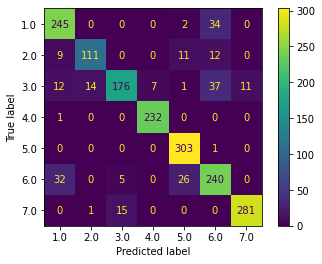

In [22]:
# Plot Confusion Matrix
cm = confusion_matrix(y_test.ravel(), predictions, labels=SVM_Modle.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=SVM_Modle.classes_)
disp.plot()
plt.show()

In [23]:
# Get Accuracy Of the Model
accuracy_score(y_test.ravel(), predictions, normalize=True)

0.8730071467839472

In [24]:
LDA = LinearDiscriminantAnalysis()
LDA_Transformed = LDA.fit_transform(X_train,y_train.ravel())

In [25]:
LDA.explained_variance_ratio_

array([0.27111072, 0.2485046 , 0.20769583, 0.1171063 , 0.08897277,
       0.06660978])

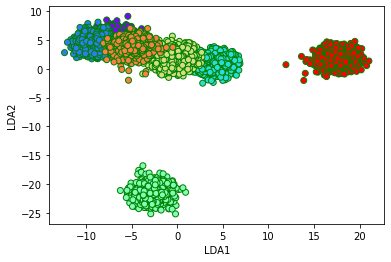

In [26]:
myplt.xlabel('LDA1')
myplt.ylabel('LDA2')
myplt.scatter(LDA_Transformed[:,0],LDA_Transformed[:,1],c=y_train.ravel() , cmap='rainbow', edgecolors='g')

In [30]:
# Save The Model
filename = 'model1.sav'
pickle.dump(SVM_Modle, open(filename, 'wb'))